In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    28161885.0
Deaths         909479.0
Recovered    18992383.0
Active        8259576.0
dtype: float64

In [3]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,6396551,191766,2403511,3800825.0
Brazil,4238446,129522,3657701,451223.0
India,4562414,76271,3542663,943480.0
Mexico,652364,69649,541804,40911.0
United Kingdom,360544,41697,1845,317002.0
...,...,...,...,...
Dominica,24,0,18,6.0
Grenada,24,0,24,0.0
Laos,22,0,21,1.0


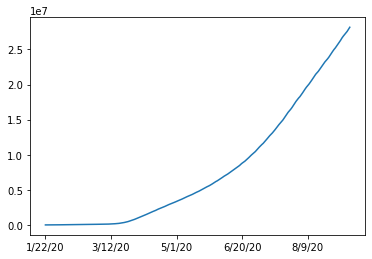

In [4]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

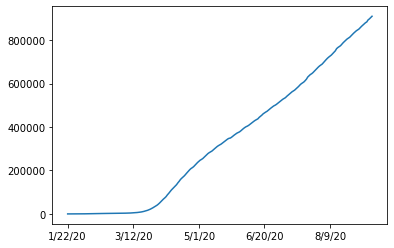

In [5]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

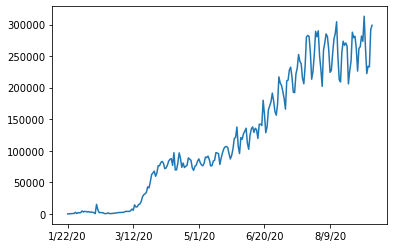

In [6]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

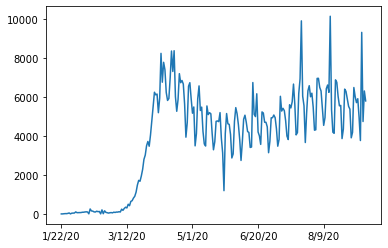

In [7]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

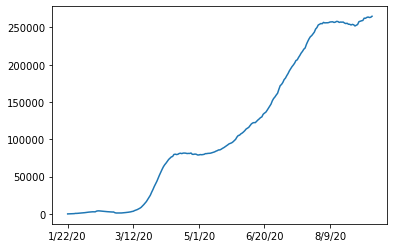

In [8]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

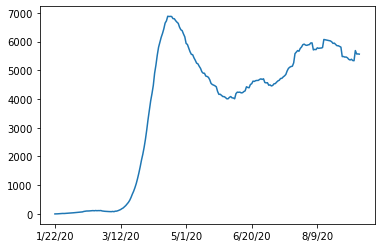

In [9]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [10]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,6073840,6113510,6150016,6200518,6244970,6276365,6300622,6327009,6360212,6396100
India,0,0,0,0,0,0,0,0,1,1,...,3769523,3853406,3936747,4023179,4113811,4204613,4280422,4370128,4465863,4562414
Brazil,0,0,0,0,0,0,0,0,0,0,...,3950931,3997865,4041638,4091801,4123000,4137521,4147794,4162073,4197889,4238446
Russia,0,0,0,0,0,0,0,0,0,2,...,997072,1001965,1006923,1011987,1017131,1022228,1027334,1032354,1037526,1042836
Peru,0,0,0,0,0,0,0,0,0,0,...,652037,657129,657129,670145,676848,683702,689977,691575,696190,702776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laos,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [11]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,184664,185720,186790,187755,188538,188941,189208,189653,190859,191766
Brazil,0,0,0,0,0,0,0,0,0,0,...,122596,123780,124614,125502,126203,126650,126960,127464,128539,129522
India,0,0,0,0,0,0,0,0,0,0,...,66333,67376,68472,69561,70626,71642,72775,73890,75062,76271
Mexico,0,0,0,0,0,0,0,0,0,0,...,65241,65816,66329,66851,67326,67558,67781,68484,69049,69649
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,41592,41602,41616,41626,41638,41640,41643,41675,41683,41697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bhutan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seychelles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,78357.0,83883.0,83341.0,86432.0,90632.0,90802.0,75809.0,89706.0,95735.0,96551.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42659.0,46934.0,43773.0,50163.0,31199.0,14521.0,10273.0,14279.0,35816.0,40557.0
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,43253.0,39670.0,36506.0,50502.0,44452.0,31395.0,24257.0,26387.0,33203.0,35888.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10504.0,10933.0,12026.0,10684.0,9924.0,6986.0,9215.0,12027.0,12259.0,11905.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8115.0,8581.0,8959.0,10476.0,0.0,0.0,26560.0,8964.0,8866.0,10764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ghana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,162.0,198.0,55.0,64.0,0.0,0.0,92.0,143.0,301.0,0.0
Saint Vincent and the Grenadines,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Lesotho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,16.0,0.0


In [13]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1045.0,1043.0,1096.0,1089.0,1065.0,1016.0,1133.0,1115.0,1172.0,1209.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1215.0,1184.0,834.0,888.0,701.0,447.0,310.0,504.0,1075.0,983.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1067.0,1056.0,1070.0,965.0,783.0,403.0,267.0,445.0,1206.0,907.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,827.0,575.0,513.0,522.0,475.0,232.0,223.0,703.0,565.0,600.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259.0,199.0,243.0,262.0,116.0,120.0,270.0,276.0,253.0,249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


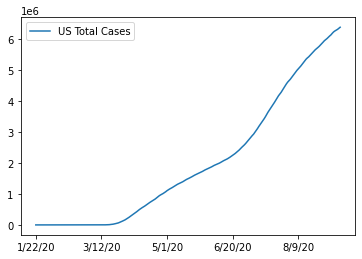

In [14]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

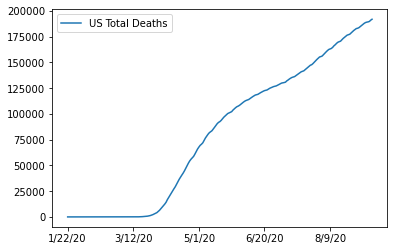

In [15]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

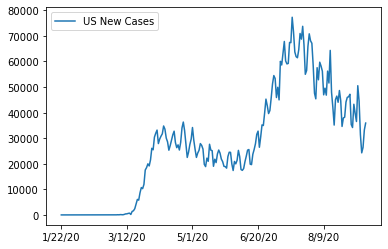

In [16]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

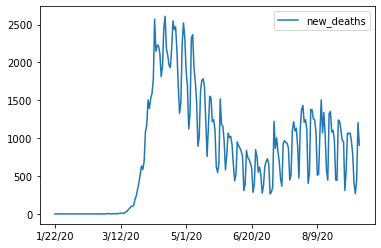

In [17]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
California,3671
Florida,2472
Illinois,1953
Georgia,1823
Texas,1641
Tennessee,1631
Wisconsin,1547
Missouri,1234
Virginia,1231


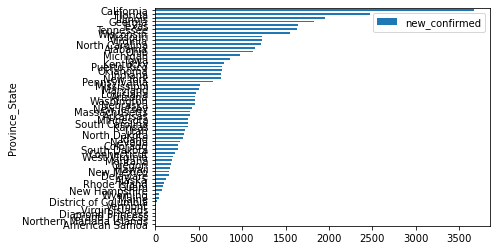

In [18]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
Florida,216
California,94
Georgia,76
Tennessee,57
Mississippi,33
South Carolina,33
North Carolina,32
Ohio,30
Illinois,28


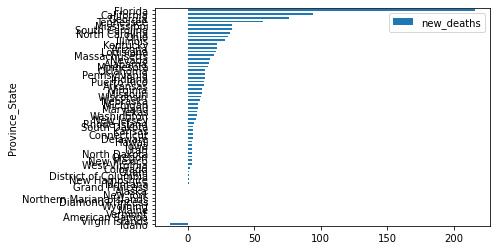

In [19]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

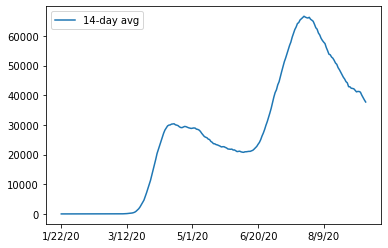

In [20]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

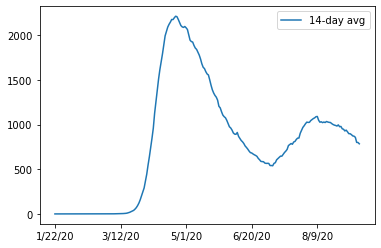

In [21]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [22]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565
Alaska,0,0,0,0,0,0,0,0,0,0,...,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002
Arkansas,0,0,0,0,0,0,0,0,0,0,...,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804
California,0,0,0,0,2,2,2,2,2,3,...,715617,721281,726018,730662,735314,738856,740965,744344,747290,750961
Colorado,0,0,0,0,0,0,0,0,0,0,...,57755,57999,58267,58267,58966,59251,59464,59651,59891,60155
Connecticut,0,0,0,0,0,0,0,0,0,0,...,53006,53108,53209,53365,53365,53365,53365,53782,53871,54093
Delaware,0,0,0,0,0,0,0,0,0,0,...,17535,17549,17653,17752,17892,18043,18249,18308,18308,18466


In [23]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,2200,2217,2233,2266,2275,2276,2276,2277,2285,2301
Alaska,0,0,0,0,0,0,0,0,0,0,...,39,39,40,40,42,42,42,42,42,42
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,5044,5065,5130,5171,5207,5221,5219,5221,5251,5273
Arkansas,0,0,0,0,0,0,0,0,0,0,...,814,841,861,873,882,894,908,917,928,940
California,0,0,0,0,0,0,0,0,0,0,...,13150,13317,13493,13638,13709,13731,13758,13823,13983,14077
Colorado,0,0,0,0,0,0,0,0,0,0,...,1946,1952,1955,1955,1971,1972,1973,1973,1977,1979
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4466,4467,4468,4468,4468,4468,4468,4474,4474,4478
Delaware,0,0,0,0,0,0,0,0,0,0,...,605,606,606,606,608,609,609,609,609,613


In [24]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1558.0,623.0,1046.0,1108.0,1410.0,511.0,659.0,633.0,811.0,1148.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,65.0,102.0,120.0,93.0,83.0,33.0,35.0,63.0,121.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,507.0,519.0,1092.0,728.0,836.0,250.0,197.0,81.0,496.0,461.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273.0,615.0,969.0,1094.0,515.0,687.0,350.0,294.0,385.0,398.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,3142.0,5664.0,4737.0,4644.0,4652.0,3542.0,2109.0,3379.0,2946.0,3671.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,244.0,268.0,0.0,699.0,285.0,213.0,187.0,240.0,264.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.0,102.0,101.0,156.0,0.0,0.0,0.0,417.0,89.0,222.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,106.0,14.0,104.0,99.0,140.0,151.0,206.0,59.0,0.0,158.0


In [25]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,17.0,16.0,33.0,9.0,1.0,0.0,1.0,8.0,16.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,21.0,65.0,41.0,36.0,14.0,-2.0,2.0,30.0,22.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,27.0,20.0,12.0,9.0,12.0,14.0,9.0,11.0,12.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128.0,167.0,176.0,145.0,71.0,22.0,27.0,65.0,160.0,94.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,3.0,0.0,16.0,1.0,1.0,0.0,4.0,2.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,4.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0
